In [17]:
import torch.optim as optim
import torch
import matplotlib.pyplot as plt
from warmup import (get_linear_schedule_with_warmup, get_constant_schedule_with_warmup,
                    get_polynomial_decay_schedule_with_warmup, get_cosine_schedule_with_warmup,
                    get_cosine_with_hard_restarts_schedule_with_warmup)

In [18]:
torch.manual_seed(1)

LR = 0.1  # 初始学习率
iteration = 10
max_epoch = 200

weights = torch.tensor(1, requires_grad=True, dtype=torch.float32)
target = torch.zeros(1)

In [19]:
def warmup_test(LR_init, weights_init, warmup_func, **kwargs):
    optimizer = optim.SGD([weights_init], lr=LR_init, momentum=0.9)
    scheduler_lr = warmup_func(optimizer, **kwargs)

    lr_list = list()
    for epoch in range(max_epoch):
        lr_list.append(optimizer.param_groups[0]['lr'])
        for step, _ in enumerate(range(iteration)):
            loss = torch.pow((weights - target), 2)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            # scheduler_lr.step()  # step级进行一次学习调整
        scheduler_lr.step()  # epoch级进行一次学习率调整
    return lr_list


lr_list_constant = warmup_test(LR, weights, get_constant_schedule_with_warmup, num_warmup_steps=10)
lr_list_linear = warmup_test(LR, weights, get_linear_schedule_with_warmup,
                             num_warmup_steps=20,
                             num_training_steps=40)
lr_list_polynomial_decay = warmup_test(LR, weights, get_polynomial_decay_schedule_with_warmup,
                                       num_warmup_steps=40, num_training_steps=60, lr_end=1e-7, power=0.1)
lr_list_cosine_80 = warmup_test(LR, weights, get_cosine_schedule_with_warmup,
                             num_warmup_steps=60, num_training_steps=80, num_cycles=0.5)
lr_list_cosine_120 = warmup_test(LR, weights, get_cosine_schedule_with_warmup,
                             num_warmup_steps=60, num_training_steps=120, num_cycles=1)
lr_list_cosine_with_hard_restarts = warmup_test(LR, weights, get_cosine_with_hard_restarts_schedule_with_warmup,
                                                num_warmup_steps=80, num_training_steps=100, num_cycles=3)

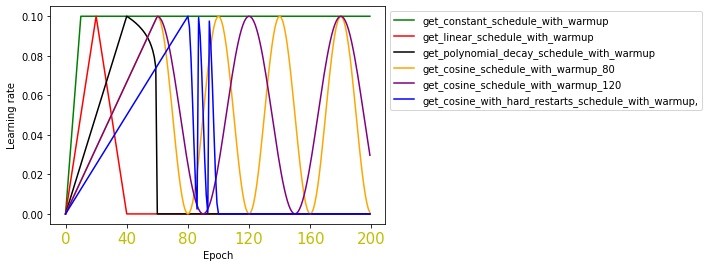

In [20]:
plt.plot(range(0, max_epoch), lr_list_constant, label="get_constant_schedule_with_warmup", color='green')
plt.plot(range(0, max_epoch), lr_list_linear, label="get_linear_schedule_with_warmup", color='red')
plt.plot(range(0, max_epoch), lr_list_polynomial_decay, label="get_polynomial_decay_schedule_with_warmup",
         color='black')
plt.plot(range(0, max_epoch), lr_list_cosine_80, label="get_cosine_schedule_with_warmup_80",
         color='orange')
plt.plot(range(0, max_epoch), lr_list_cosine_120, label="get_cosine_schedule_with_warmup_120",
         color='purple')
plt.plot(range(0, max_epoch), lr_list_cosine_with_hard_restarts,
         label="get_cosine_with_hard_restarts_schedule_with_warmup,",
         color='b')

plt.xticks(range(0, 201, 40), color='y', size=15)
plt.xlabel("Epoch")
plt.ylabel("Learning rate")
plt.legend(bbox_to_anchor=(1, 1))
plt.show()